Finding Heavy Traffic Indicators on I-94.
In this project, we will be analyzing a dataset that can help us learn about different indicators (or causes) of high traffic in I-94, one of the biggest east to west interstate highways.

We will be using data visualization techniques with the help of libraries such as Matplotlib, Seaborn, Pandas, etc. to determine the potential indicators of high traffic.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

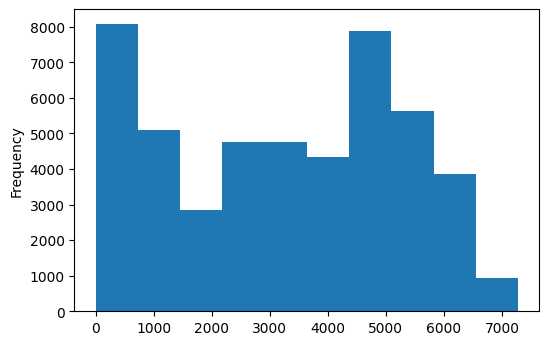

In [3]:
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

In [4]:
#Convert to the 'date_time' column to datetime using pd.to_datetime.
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
daytime_data = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour <= 19)]
nighttime_data = traffic[(traffic['date_time'].dt.hour > 19) | (traffic['date_time'].dt.hour < 7)]

Create Histograms for both daytime and nighttime seperately in terms of the traffic_volume and see how they compare (their max volumes, what hours are the relative peaks at, etc.).

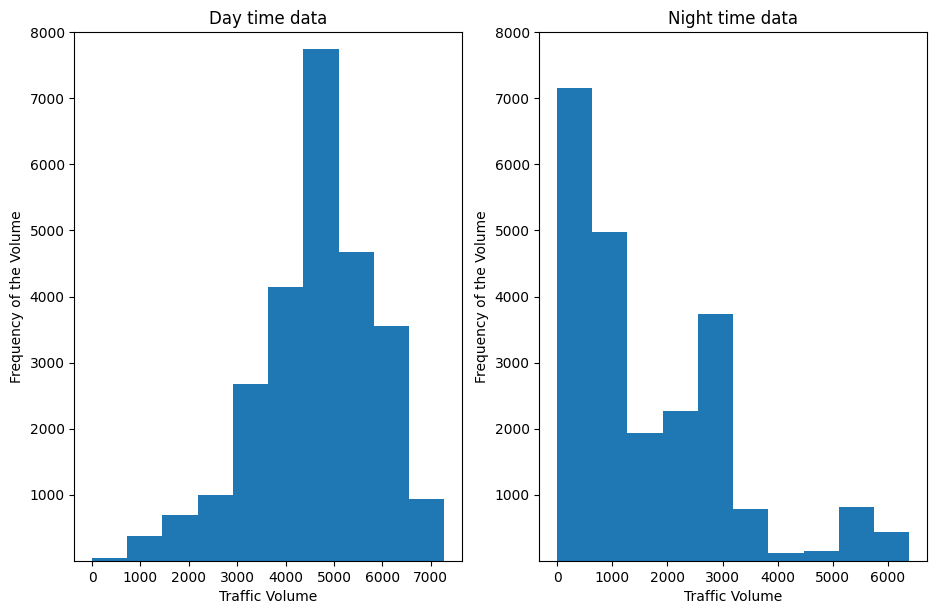

In [5]:
plt.figure(figsize = (11, 7))
plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Day time data')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency of the Volume')
plt.ylim(1, 8000)
plt.subplot(1, 2, 2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Night time data')
plt.xlabel('Traffic Volume')
plt.ylim(1, 8000)
plt.ylabel('Frequency of the Volume')
plt.show()

The day time data is roughly a normal distribution whereas the night time data has the representaton of a skewed right curve. Although the night time data suggests that there's isn't alot of traffic at night, we can still use the night time data as our controlled group to derive loose casual conclusions.

Let's aggregate data by the mean value of 'traffic_volume' for each month and plot it on a line plot in order to determine how the volume changes with respect to time throughout the year. That might give insight into how seasons affect the traffic and incline us towards certain causes as potential traffic indicators (cold causing more cars to break down, etc.).

<ipython-input-6-335862f617a7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



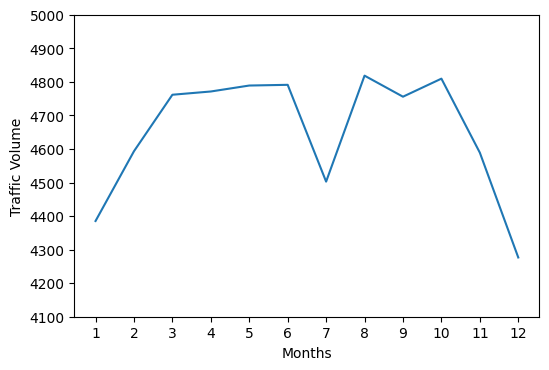

In [6]:
daytime_data['months'] = daytime_data.loc[:, 'date_time'].dt.month
data_by_months = daytime_data.groupby('months').mean()
plt.plot(data_by_months['traffic_volume'])
plt.xticks(np.arange(1, 13, 1))
plt.xlabel('Months')
plt.yticks(np.arange(4100, 5100, 100))
plt.ylabel('Traffic Volume')
plt.show()


During the months of winter (October-February), either the traffic is generally lower or at the very least, declining. Another interesting observation is the fact that there's a sharp dip in traffic volume in the month of July.

Next, we will make a plot for traffic volume as it relates to the day of the week.

<ipython-input-7-cbd175e8ded3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



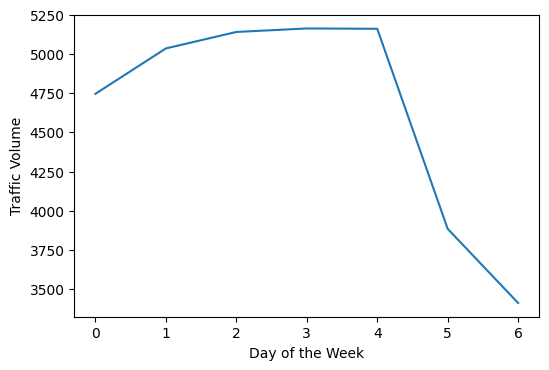

In [7]:
daytime_data['days'] = daytime_data['date_time'].dt.dayofweek
data_by_days = daytime_data.groupby('days').mean()
plt.plot(data_by_days['traffic_volume'])
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')
plt.show()

Legend: 0 is Monday, 6 is Sunday.

As expected, the volume is its maximal at the start of the week, maintains itself up until Friday (4) and then starts to drizzle out. By Sunday, there's approximately a 35% dip compared to what the volume usually is on Monday, on average.

Now we will be comparing the traffic volume as it relates to the hour of the day.

<ipython-input-8-3ad207a6d5c1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



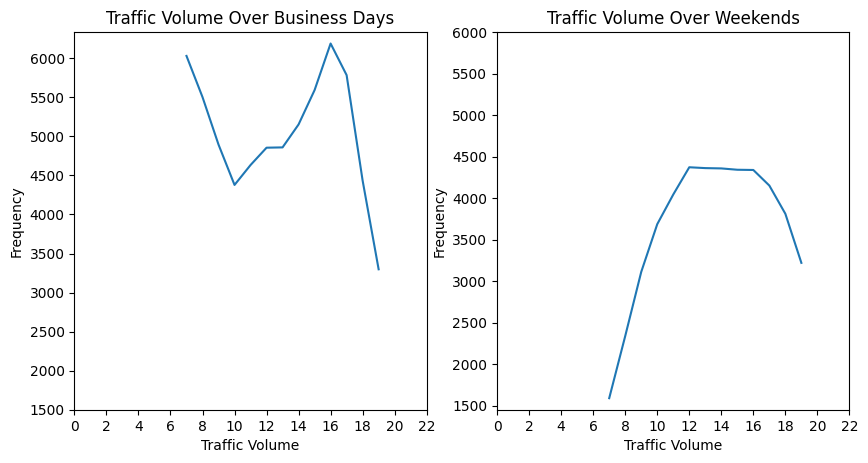

In [8]:
daytime_data['hours'] = daytime_data['date_time'].dt.hour
business_days = daytime_data[daytime_data['days'] <= 4]
weekends = daytime_data[daytime_data['days'] >= 5]
business_hourly = business_days.groupby('hours').mean()
weekends_hourly = weekends.groupby('hours').mean()
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(business_hourly['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume Over Business Days')
plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(1500, 6500, 500))
plt.subplot(1, 2, 2)
plt.plot(weekends_hourly['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Traffic Volume Over Weekends')
plt.xticks(np.arange(0, 24, 2))
plt.yticks(np.arange(1500, 6500, 500))
plt.show()



Business Days: The traffic starts off big on volume and then eventually settles down (as people reach their work places) by 9 AM. Then it reaches its second peak around 4-6PM (as people are leaving from their work places to their homes). 

Weekends:
People like to go out and about starting from 10-4 to have their outings, and that's usually the peak for the traffic over the weekends. The peak for weekends is relatively smaller than the peak for the business days.

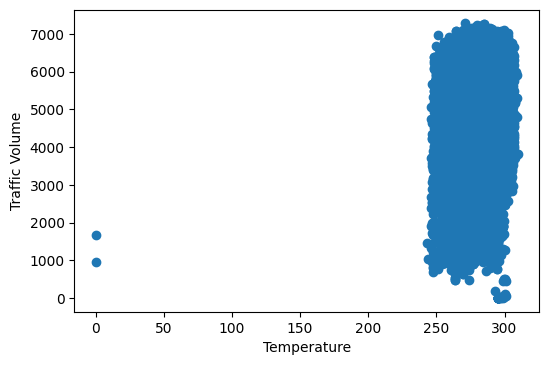

In [9]:
all_corr = daytime_data.corr()
traffic_corr = all_corr['traffic_volume']

#Since the traffic correlates the strongest with temp:
plt.scatter(daytime_data['temp'], daytime_data['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

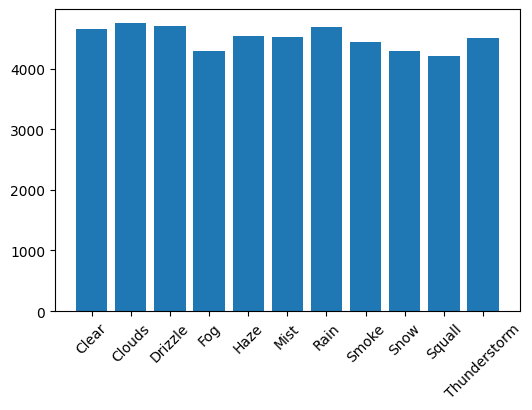

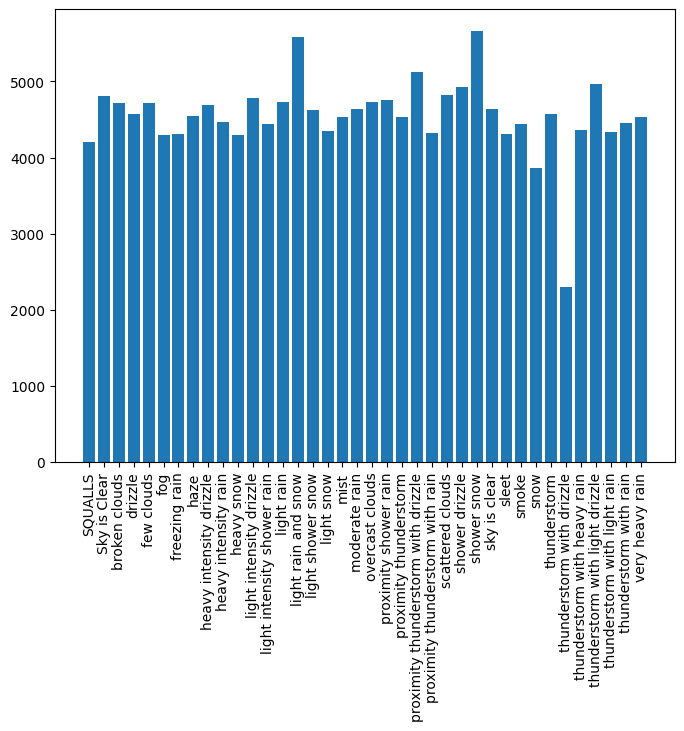

In [22]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()
plt.bar(by_weather_main.index, by_weather_main['traffic_volume'])
plt.xticks(rotation = 45)
plt.show()
plt.figure(figsize = (8, 6))
plt.bar(by_weather_description.index, by_weather_description['traffic_volume'])
plt.xticks(rotation = 90)
plt.show()

Based on the bar plot developed due to 'by_weather_description', it is infered that any type of moderate to extreme snow activity can cause traffic volume to increase.

All in all, multiple traffic indicators we have gathered can be concluded in the following manner:
1. During the years, it is the summer season during which the traffic is the highest.
2. During a week, it is usually the weekdays, specifically the earlier weekdays during which traffic peaks.
3. During a weekday, it is usually from 7-8AM and 4-6PM that traffic is the highest. 
4. Moderate or more intense snowfall/hail can cause traffic volume to increase.